# Online Retail Exploratory Data Analysis with Python

In [1]:
# your code here
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# lead dataset
data = pd.read_excel('Online Retail.xlsx')

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# this data have some missing value
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# fill the mising values with the fillna method
data['CustomerID'].fillna(method='ffill',inplace=True)
data['Description'].fillna(method='ffill',inplace=True)

In [7]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

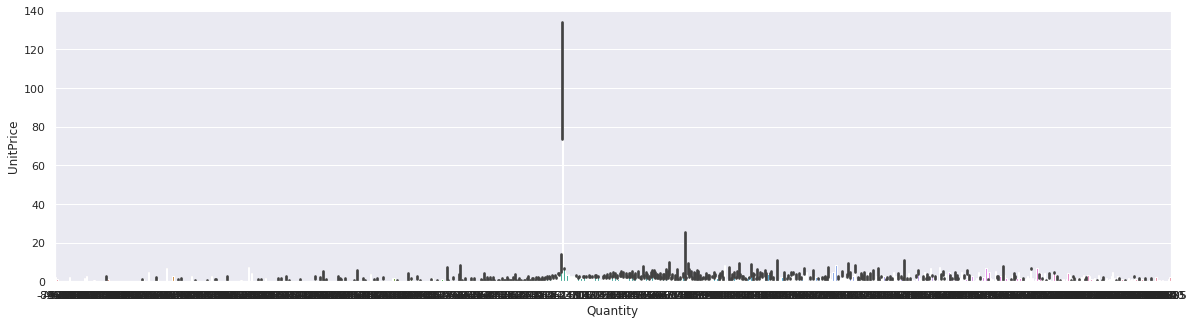

In [8]:
# before removing the outliers
# there are some outliers in unitprice column
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x=data['Quantity'],y=data['UnitPrice'],data=data)

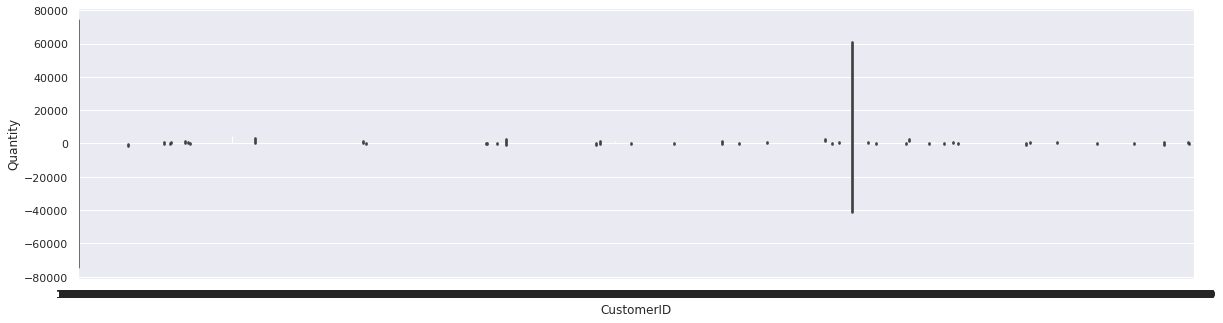

In [12]:
# before removing the outliers
# there are some outliers in quantity column
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x=data['CustomerID'],y=data['Quantity'],data=data)

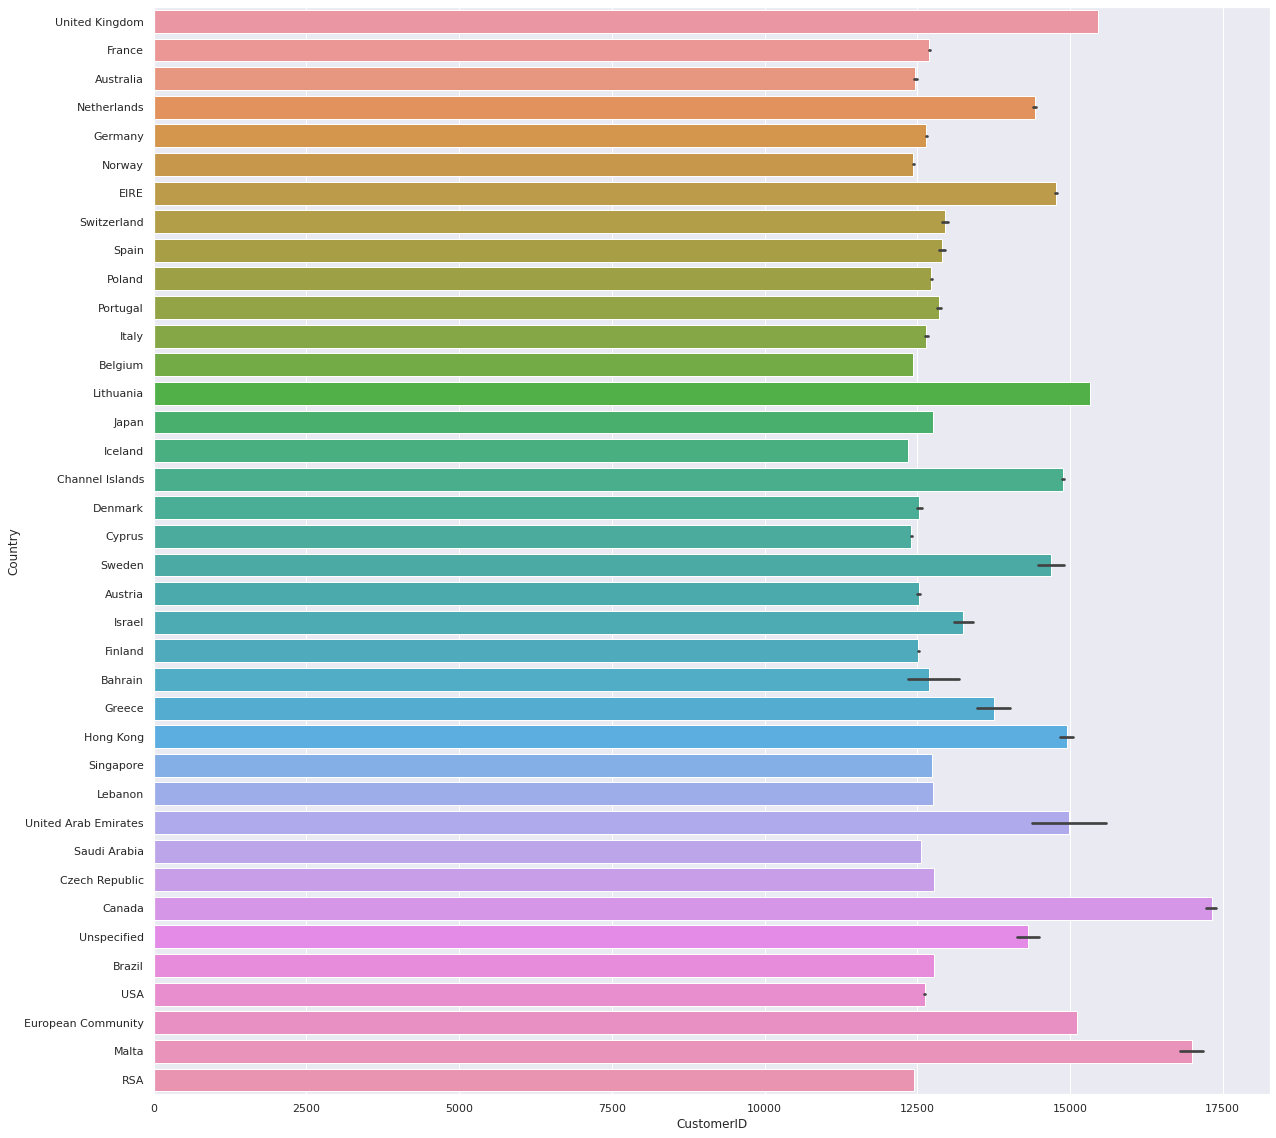

In [9]:
# there are some outliers by country
sns.set(rc={'figure.figsize':(20,20)})
sns.barplot(x=data['CustomerID'],y=data['Country'],data=data)

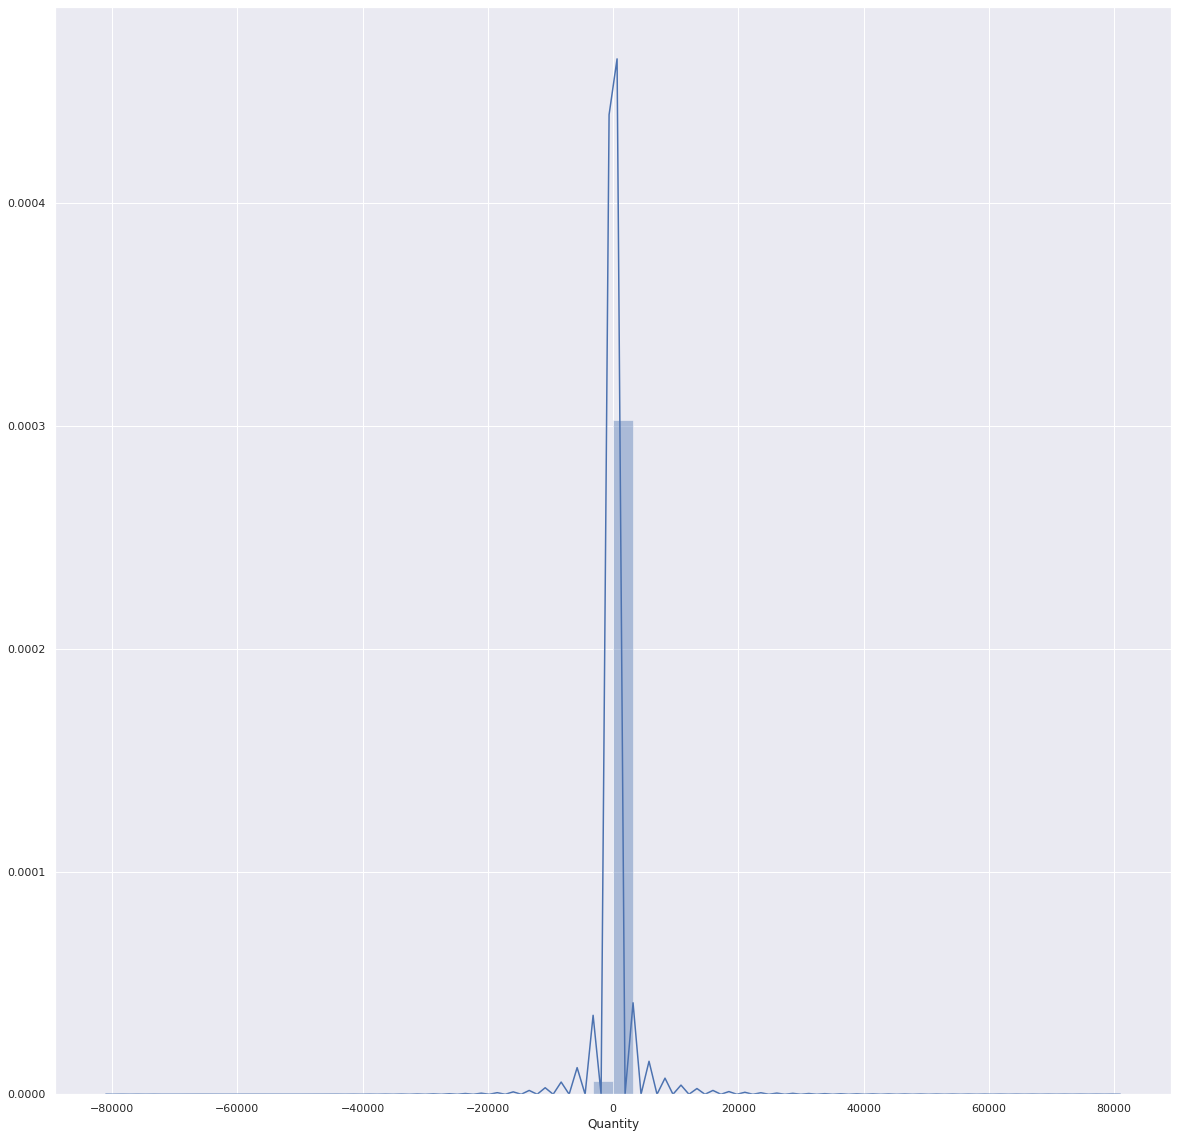

In [10]:
# distribution plot
sns.distplot(data['Quantity'])

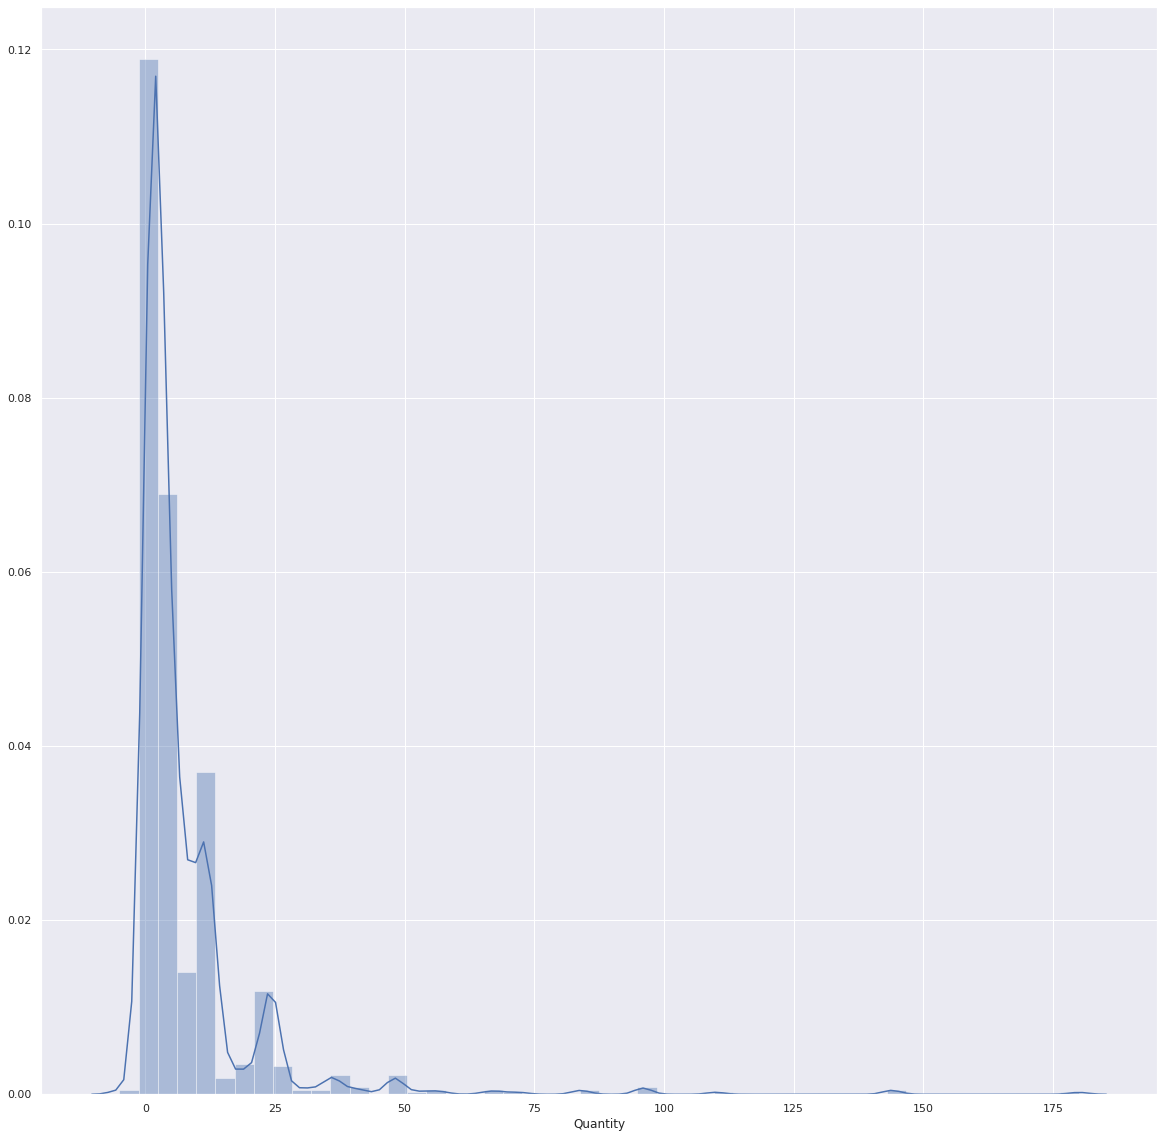

In [11]:
# distribution plot
sns.distplot(data['Quantity'][-1000:])

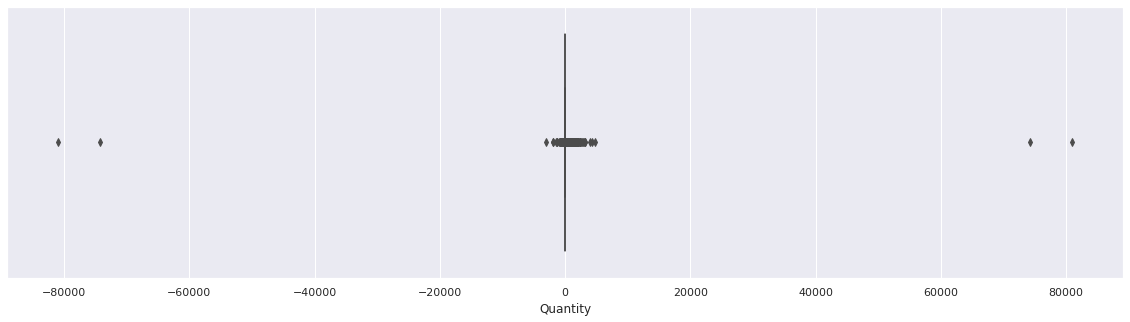

In [66]:
# box plot
sns.boxplot(data['Quantity'],data=data)

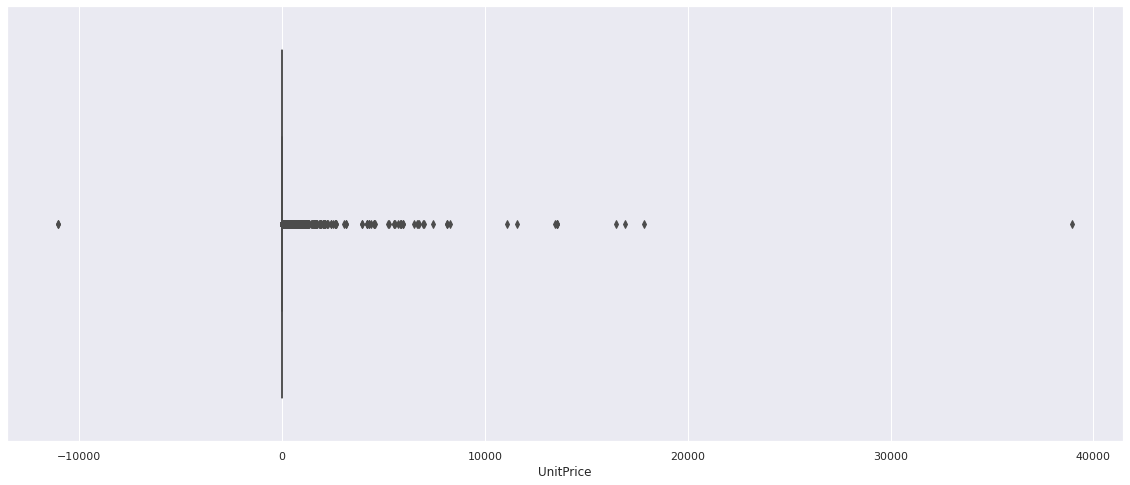

In [25]:
sns.boxplot(data['UnitPrice'],data=data)

# removing outliers from columns

In [31]:
# Removing outliers from quantity column
upper_limit = data['Quantity'].quantile(0.99)
lower_limit = data['Quantity'].quantile(0.01)
print('upper_limit',upper_limit)
print('lower_limit',lower_limit)

upper_limit 100.0
lower_limit -2.0


In [32]:
# find the outliers
data.loc[(data['Quantity'] > upper_limit) | (data['Quantity'] < lower_limit)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
178,536387,79321,CHILLI LIGHTS,192,2010-12-01 09:58:00,3.82,16029.0,United Kingdom
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01 09:58:00,3.37,16029.0,United Kingdom
180,536387,22779,WOODEN OWLS LIGHT GARLAND,192,2010-12-01 09:58:00,3.37,16029.0,United Kingdom
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,2010-12-01 09:58:00,1.45,16029.0,United Kingdom
...,...,...,...,...,...,...,...,...
541545,581501,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,180,2011-12-09 10:46:00,0.19,12985.0,United Kingdom
541702,581566,23404,HOME SWEET HOME BLACKBOARD,144,2011-12-09 11:50:00,3.26,18102.0,United Kingdom
541711,581567,21326,AGED GLASS SILVER T-LIGHT HOLDER,144,2011-12-09 11:56:00,0.55,16626.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom


In [33]:
# deleting the outlier
df = data.loc[(data['Quantity'] < upper_limit) & (data['Quantity'] > lower_limit)]
print('before removing outliers :',len(data))
print('after removing outliers :',len(df))
print('outliers :', len(data) - len(df))

before removing outliers : 541909
after removing outliers : 528700
outliers : 13209


In [34]:
# capping - change the outlier values to upper_limit or lower_limit
df = df.copy()
df.loc[df['Quantity'] > upper_limit, 'Quantity'] = upper_limit
df.loc[df['Quantity'] < lower_limit, 'Quantity'] = lower_limit

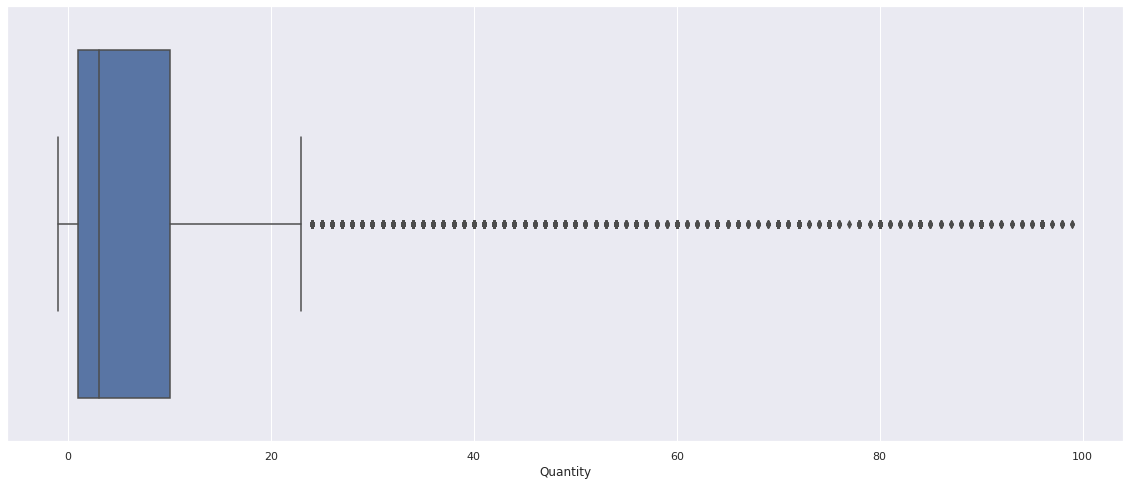

In [35]:
sns.boxplot(df['Quantity'])

In [36]:
# Removing outliers from UnitPrice column
upper_limit = data['UnitPrice'].quantile(0.99)
lower_limit = data['UnitPrice'].quantile(0.01)
print('upper_limit',upper_limit)
print('lower_limit',lower_limit)

upper_limit 18.0
lower_limit 0.19


In [37]:
# find the outliers
data.loc[(data['UnitPrice'] > upper_limit) | (data['UnitPrice'] < lower_limit)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
168,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,2010-12-01 09:56:00,19.95,17420.0,United Kingdom
219,536390,20668,DISCO BALL CHRISTMAS DECORATION,288,2010-12-01 10:19:00,0.10,17511.0,United Kingdom
246,536392,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2010-12-01 10:29:00,165.00,13705.0,United Kingdom
294,536396,22803,IVORY EMBROIDERED QUILT,2,2010-12-01 10:51:00,35.75,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541459,581498,22838,3 TIER CAKE TIN RED AND CREAM,1,2011-12-09 10:26:00,29.17,16558.0,United Kingdom
541527,581498,84968e,SET OF 16 VINTAGE BLACK CUTLERY,1,2011-12-09 10:26:00,24.96,16558.0,United Kingdom
541540,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,16558.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom


In [38]:
# triming - deleting the outlier
df = data.loc[(data['UnitPrice'] < upper_limit) & (data['UnitPrice'] > lower_limit)]
print('before removing outliers :',len(data))
print('after removing outliers :',len(df))
print('outliers :', len(data) - len(df))

before removing outliers : 541909
after removing outliers : 530853
outliers : 11056


In [39]:
# capping - change the outlier values to upper_limit or lower_limit
df = df.copy()
df.loc[df['UnitPrice'] > upper_limit, 'UnitPrice'] = upper_limit
df.loc[df['UnitPrice'] < lower_limit, 'UnitPrice'] = lower_limit

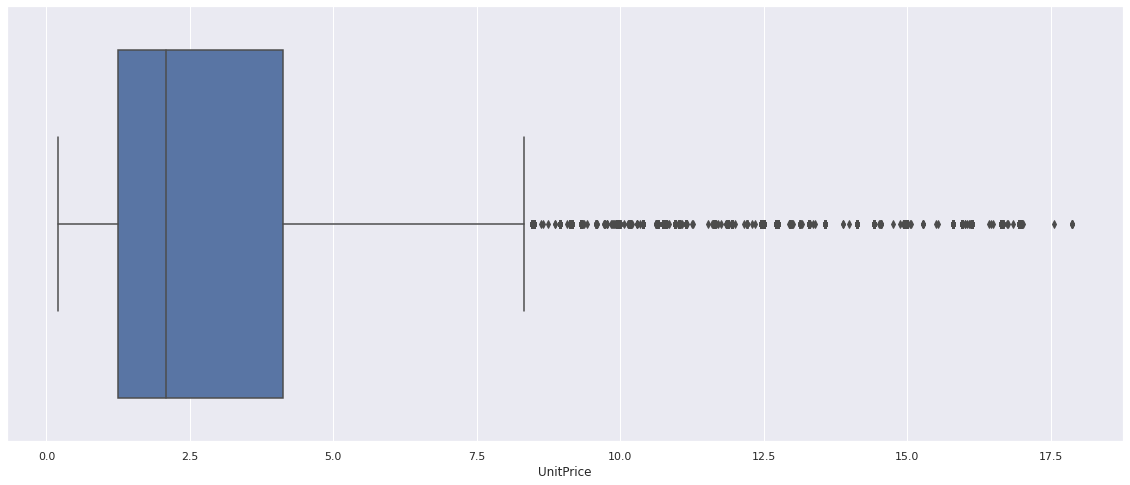

In [40]:
sns.boxplot(df['UnitPrice'])

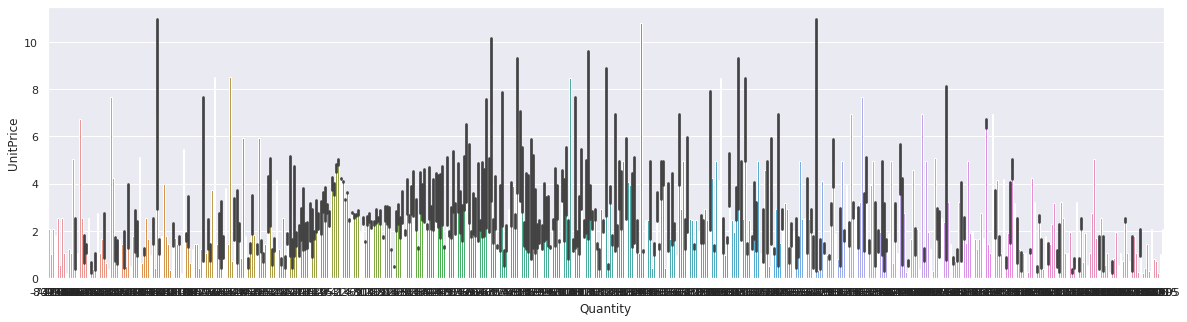

In [67]:
# After removing the outliers
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x=data['Quantity'],y=data['UnitPrice'],data=df)

In [50]:
# remove duplicate values
data = df.drop_duplicates()

In [51]:
data['year'] = data.InvoiceDate.dt.year
data['month'] = data.InvoiceDate.dt.month
data['day'] = data.InvoiceDate.dt.day
data['hours'] = data.InvoiceDate.dt.hour
data['date'] = data.InvoiceDate.dt.date
data['time'] = data.InvoiceDate.dt.time
data['month_name'] = data.InvoiceDate.dt.month_name()
data['day_name'] = data.InvoiceDate.dt.day_name()
data['today'] = pd.Timestamp.today()

In [52]:
data.rename(columns={'StockCode':'ItemCode','Description':'product'},inplace=True)

In [53]:
data

,InvoiceNo,ItemCode,product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hours,date,time,month_name,day_name,today
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,2010-12-01,08:26:00,December,Wednesday,2023-10-07 11:38:16.948770
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2010-12-01,08:26:00,December,Wednesday,2023-10-07 11:38:16.948770
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,2010-12-01,08:26:00,December,Wednesday,2023-10-07 11:38:16.948770
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2010-12-01,08:26:00,December,Wednesday,2023-10-07 11:38:16.948770
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2010-12-01,08:26:00,December,Wednesday,2023-10-07 11:38:16.948770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,12,2011-12-09,12:50:00,December,Friday,2023-10-07 11:38:16.948770
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,12,2011-12-09,12:50:00,December,Friday,2023-10-07 11:38:16.948770
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,2011-12-09,12:50:00,December,Friday,2023-10-07 11:38:16.948770
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,2011-12-09,12:50:00,December,Friday,2023-10-07 11:38:16.948770


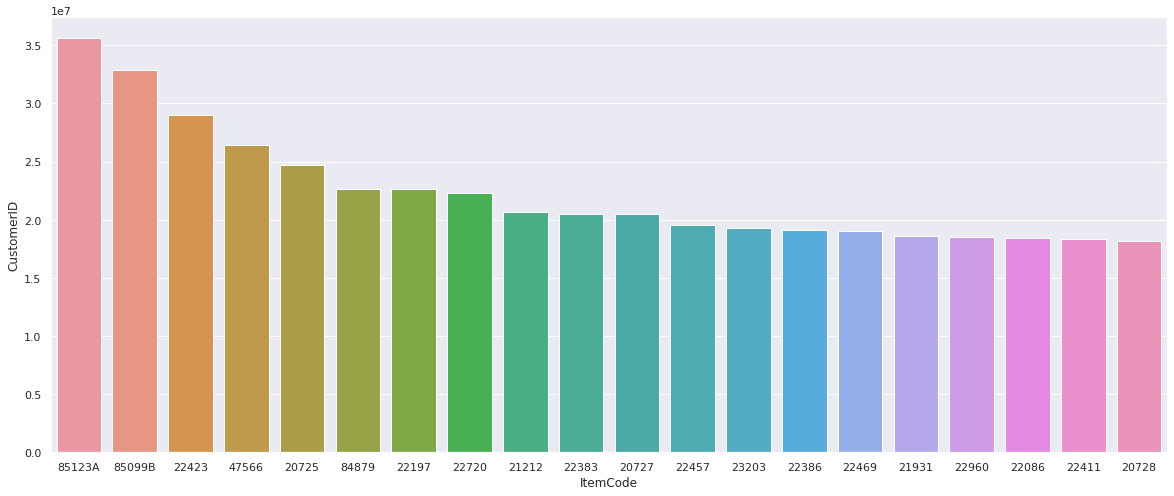

In [63]:
# top most customers favorite product
product=data.groupby(['ItemCode'], as_index=False)['CustomerID'].sum().sort_values(by='CustomerID',ascending=False).head(20)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='ItemCode',y='CustomerID',data=product)

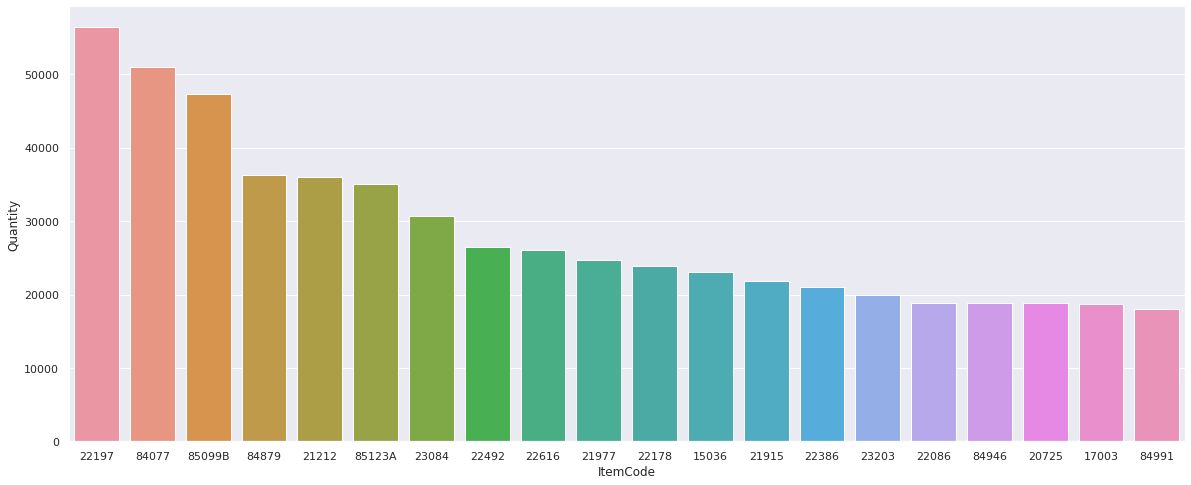

In [62]:
# Top most saled product
sale_item=data.groupby(['ItemCode'], as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False).head(20)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='ItemCode',y='Quantity',data=sale_item)

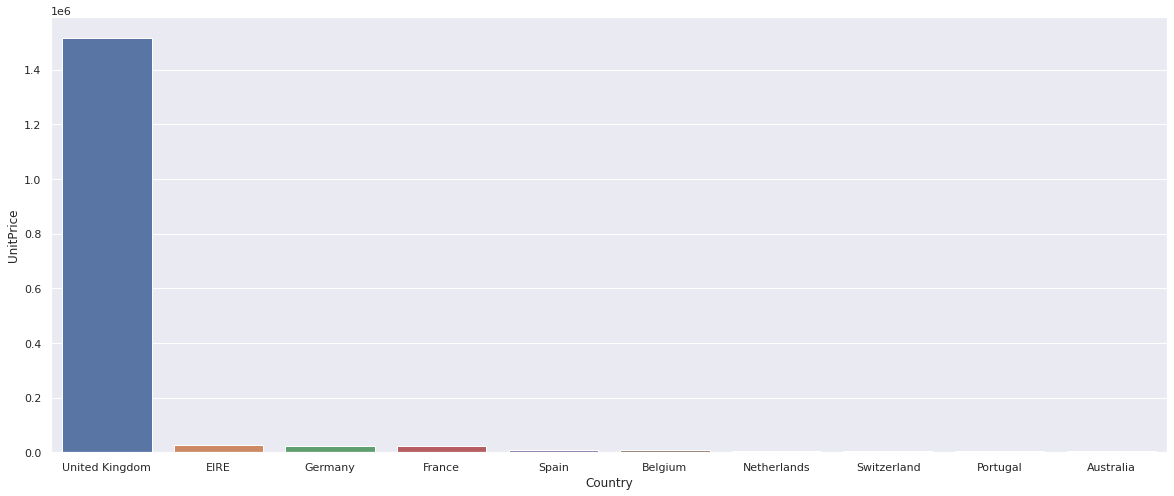

In [71]:
# most of the sale come from the UK
country_sale=data.groupby(['Country'], as_index=False)['UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='Country',y='UnitPrice',data=country_sale)

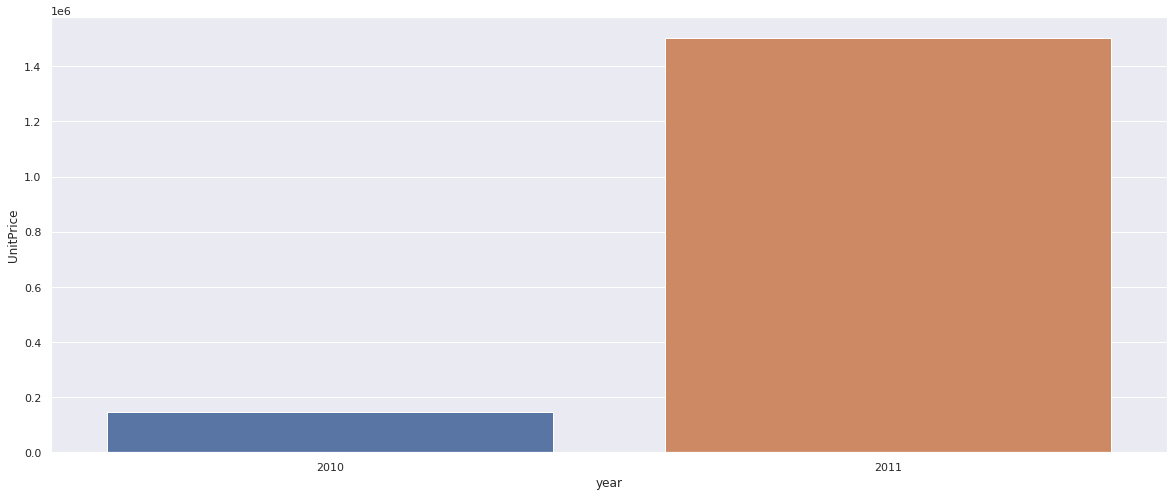

In [73]:
# Top salling year
sale_by_year=data.groupby(['year'], as_index=False)['UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='year',y='UnitPrice',data=sale_by_year)

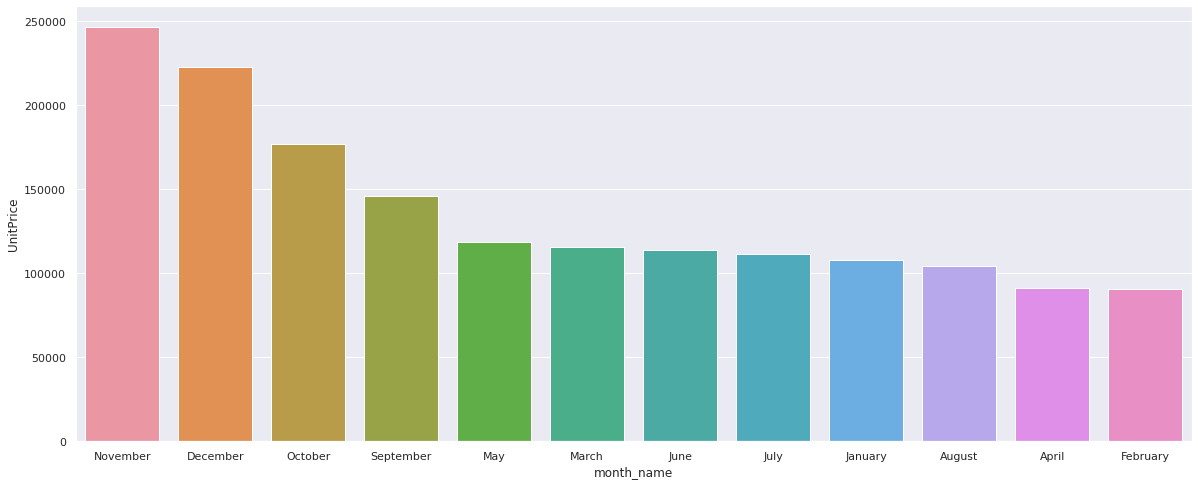

In [74]:
# Top salling months
sale_by_year=data.groupby(['month_name'], as_index=False)['UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='month_name',y='UnitPrice',data=sale_by_year)

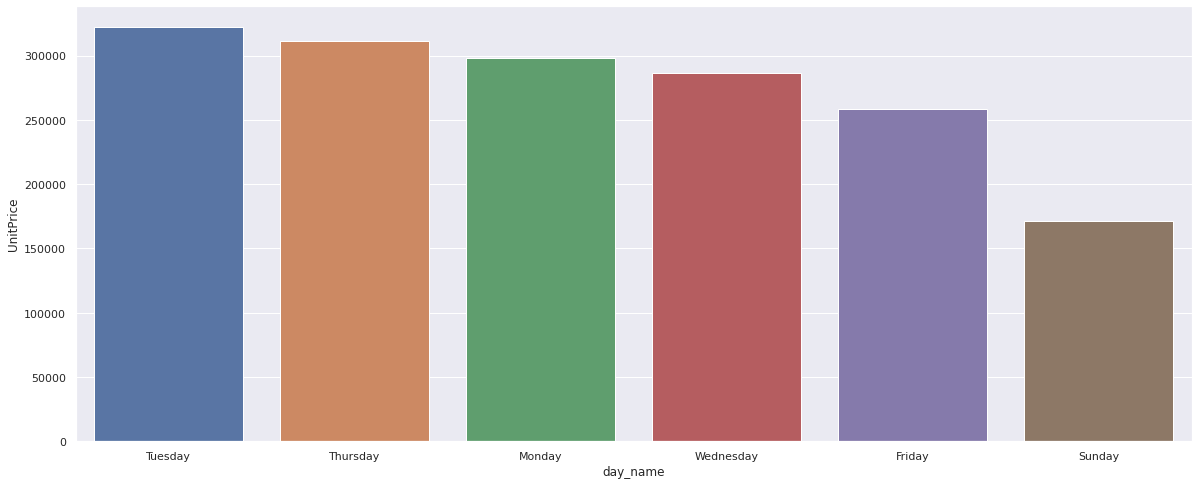

In [75]:
# Top salling days
sale_by_year=data.groupby(['day_name'], as_index=False)['UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='day_name',y='UnitPrice',data=sale_by_year)

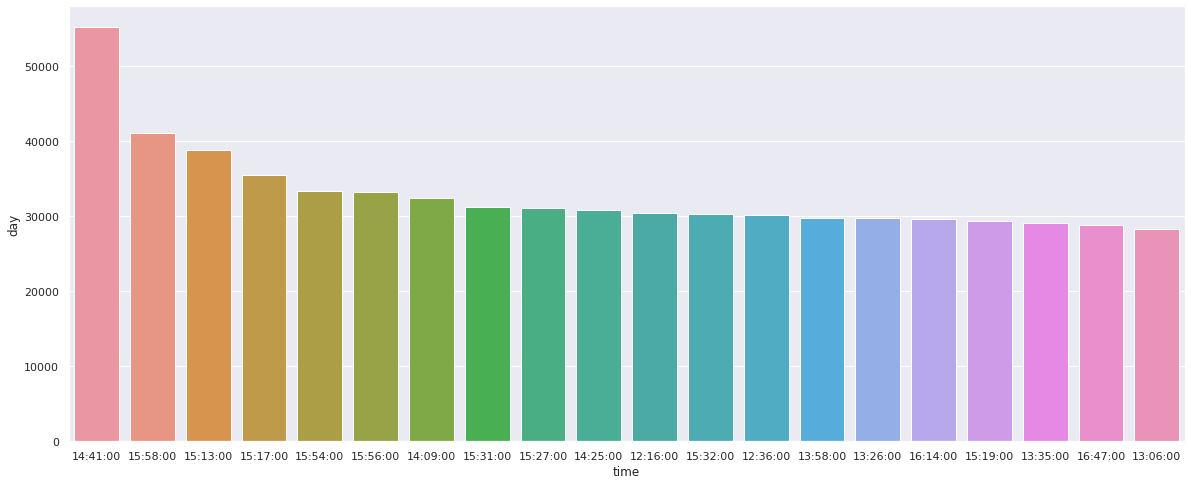

In [79]:
# Top saling time
sale_by_time=data.groupby(['time'], as_index=False)['day'].sum().sort_values(by='day',ascending=False).head(20)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='time',y='day',data=sale_by_time)

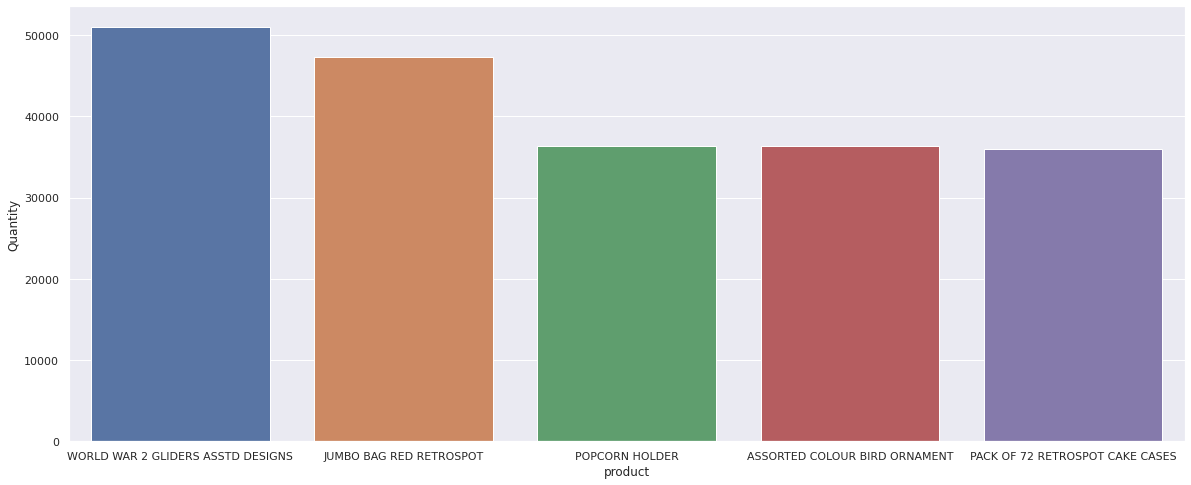

In [83]:
# Top most saled product
sale_item=data.groupby(['product'], as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False).head(5)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='product',y='Quantity',data=sale_item)

### Conclusion
There are some product such as 'WORRD WAR 2 GLIDERS ASSTD DESIGNS', 'JUMBO BAG RED RETROSPOT', 'POPCORN HOLDER PRODUCT', 'ASSORTED COLOUR BIRD ORNAMENT' AND 'PACK OF 72 RETROSPOT CAKE CASES' that are the most saling product in the month of 'October', 'November' and 'December' in the year '2011', that purchased between 02:00PM to 04:00PM on the day of 'Monday', 'Tuesday' and 'Thursday' by the country 'United kingdom'.
